In [1]:
import os

import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

from pandas.tseries.frequencies import to_offset

from pricing import *

In [2]:
data_dir = "./data/wrangled_data/"
print(*os.listdir(data_dir), sep="\n")

WTI_futures.csv
NG_option.csv
WTI_option.csv
AECO_futures.csv
NG_futures.csv


In [3]:
dfs_dict = {}
for file_name in os.listdir(data_dir):
    if ".csv" in file_name:
        df_name = file_name[:-4]+"_df"
        dfs_dict[df_name] = pd.read_csv(data_dir+file_name)
        
        dfs_dict[df_name].t  = pd.to_datetime(dfs_dict[df_name].t)
        dfs_dict[df_name]["T"] = pd.to_datetime(dfs_dict[df_name]["T"])
        
locals().update(dfs_dict)

In [4]:
pars = ["mu", "lambda"]

WTI_par_df = WTI_futures_df.groupby("t").apply(lambda x: tune(x.F.to_numpy(), 1/12)).apply(pd.Series)
WTI_par_df.columns = pars
WTI_par_df.reset_index()
WTI_futures_df = WTI_futures_df.merge(WTI_par_df, how="inner", left_on="t", right_on="t")
del WTI_par_df

NG_par_df = NG_futures_df.groupby("t").apply(lambda x: tune(x.F.to_numpy(), 1/12)).apply(pd.Series)
NG_par_df.columns = pars
NG_par_df.reset_index()
NG_futures_df = NG_futures_df.merge(NG_par_df, how="inner", left_on="t", right_on="t")
del NG_par_df

In [5]:
sample_dates = ["2020-03-02", "2020-04-20", "2020-05-01", "2020-05-29"]

WTI_futures_sample_df = WTI_futures_df.loc[WTI_futures_df.t.isin(sample_dates)]

NG_futures_sample_df = NG_futures_df.loc[NG_futures_df.t.isin(sample_dates)]

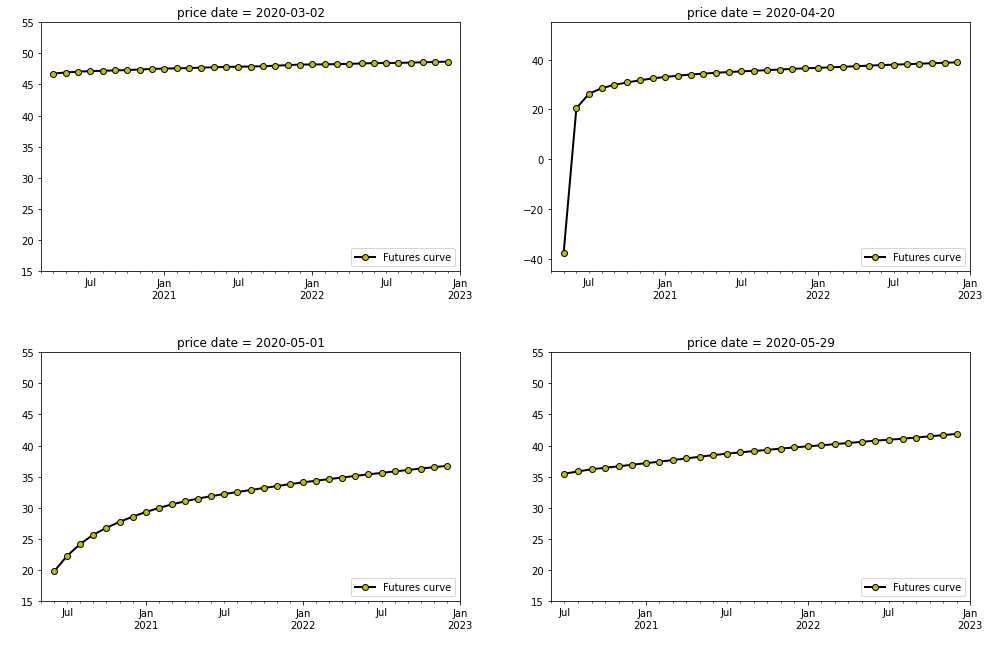

In [6]:
fig1 = plt.figure(constrained_layout=False)
fig1.set_size_inches(15, 10)

spec1 = fig1.add_gridspec(ncols=2, nrows=2)

f1_ax1 = fig1.add_subplot(spec1[0, 0])
f1_ax2 = fig1.add_subplot(spec1[0, 1])
f1_ax3 = fig1.add_subplot(spec1[1, 0])
f1_ax4 = fig1.add_subplot(spec1[1, 1])

ax1_list = [f1_ax1, f1_ax2, f1_ax3, f1_ax4]

fig1.tight_layout(pad=6)

for i in range(4):
    
    WTI_futures_curve_df = WTI_futures_sample_df.groupby("t").get_group(sample_dates[i])
    
    if i == 1:
        y_min = -45

    else:
        y_min = 15
        y_max = 55
    
    x_min = WTI_futures_curve_df["T"].min() - to_offset("1W")
    x_max = WTI_futures_curve_df["T"].max() + to_offset("2M")
        
    WTI_futures_curve_df.plot(ax=ax1_list[i], x="T", y="F", legend=True, xlabel=" ", ylabel=" ",
    style="ko-", markerfacecolor="y", linewidth=2, xlim=(x_min, x_max), ylim=(y_min, y_max)) 
    
    ax1_list[i].legend(["Futures curve"], loc="lower right")
    ax1_list[i].set_title("price date = " + str(sample_dates[i]))


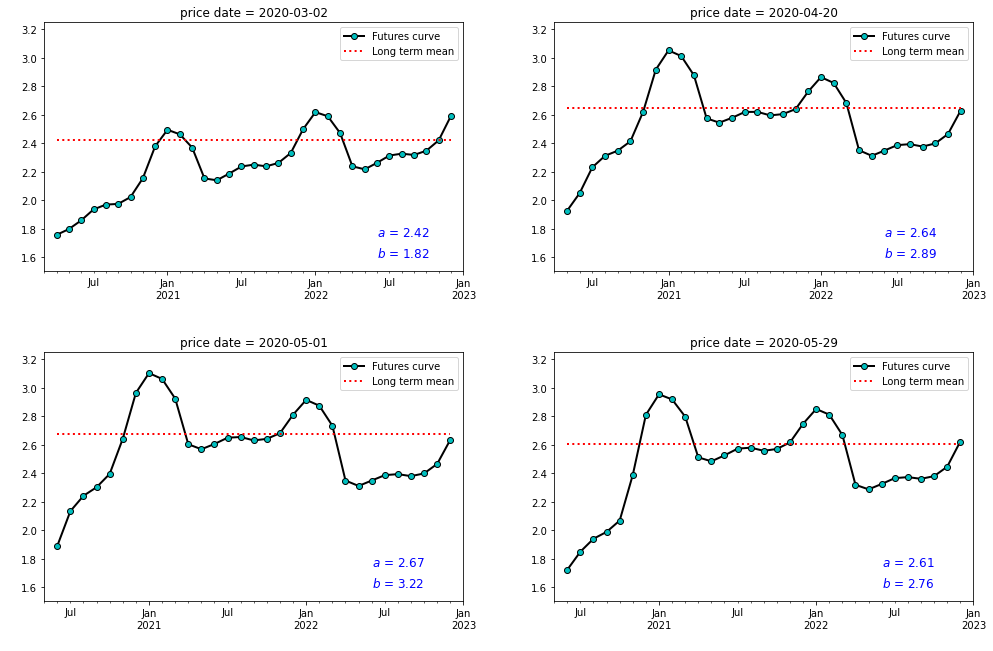

In [7]:
fig2 = plt.figure(constrained_layout=False)
fig2.set_size_inches(15, 10)

spec2 = fig2.add_gridspec(ncols=2, nrows=2)

f2_ax1 = fig2.add_subplot(spec1[0, 0])
f2_ax2 = fig2.add_subplot(spec1[0, 1])
f2_ax3 = fig2.add_subplot(spec1[1, 0])
f2_ax4 = fig2.add_subplot(spec1[1, 1])

ax2_list = [f2_ax1, f2_ax2, f2_ax3, f2_ax4]

fig2.tight_layout(pad=6)

for i in range(4):
    
    NG_futures_curve_df = NG_futures_sample_df.groupby("t").get_group(sample_dates[i])
    
    x_min = NG_futures_curve_df["T"].min()-to_offset("1W")
    x_max = NG_futures_curve_df["T"].max()+to_offset("2M")
        
    NG_futures_curve_df.plot(ax=ax2_list[i], x="T", y="F", legend=True, xlabel=" ", ylabel=" ",
    style="ko-", markerfacecolor="c", linewidth=2)
    
    NG_futures_curve_df.plot(ax=ax2_list[i], x="T", y="mu", legend=True, xlabel=" ",
    ylabel=" ", style="r:", linewidth=2, xlim=(x_min, x_max), ylim=(1.5, 3.25))
    
    x = NG_futures_curve_df["T"].iloc[-7]
    y = 1.6
    
    mu = NG_futures_curve_df["mu"].iloc[0]
    lambda_par = NG_futures_curve_df["lambda"].iloc[0]
    
    ax2_list[i].text(x, y, "$b$ = "+str(np.around(lambda_par, 2)), size=12,
    color="b")
    
    ax2_list[i].text(x, y+0.15, "$a$ = "+str(np.around(mu, 2)), size=12, color="b")
    
    ax2_list[i].legend(["Futures curve", "Long term mean"], loc="upper right")
    ax2_list[i].set_title("price date = " + str(sample_dates[i]))